In [ ]:
# example of preparing the horses and zebra dataset
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from matplotlib import pyplot
import numpy

Using TensorFlow backend.


In [ ]:
data_list = list()
for filename in listdir('/content/drive/My Drive/Pix2pix/horse2zebra/horse2zebra/trainA'):
  # load and resize the image
  pixels = load_img('/content/drive/My Drive/Pix2pix/horse2zebra/horse2zebra/trainA/' + filename, target_size=(256,256,3))
  # convert to numpy array
  pixels = img_to_array(pixels)
  # store
  data_list.append(pixels)
trainA = asarray(data_list)
numpy.save('trainA',trainA)

In [ ]:
trainA.shape

(1067, 256, 256, 3)

In [ ]:
data_list = list()
for filename in listdir('/content/drive/My Drive/Pix2pix/horse2zebra/horse2zebra/trainB'):
  # load and resize the image
  pixels = load_img('/content/drive/My Drive/Pix2pix/horse2zebra/horse2zebra/trainB/' + filename, target_size=(256,256,3))
  # convert to numpy array
  pixels = img_to_array(pixels)
  # store
  data_list.append(pixels)
trainB = asarray(data_list)
numpy.save('trainB', trainB)

In [ ]:
trainB.shape

(1334, 256, 256, 3)

In [ ]:
trainA = numpy.load('trainA.npy')
trainB = numpy.load('trainB.npy')

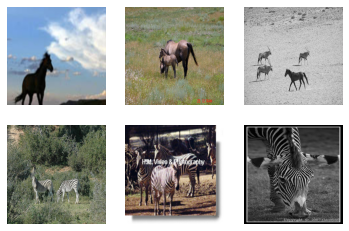

In [ ]:
from matplotlib import pyplot
# plot source images
for i in range(3):
	pyplot.subplot(2, 3, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(trainA[i].astype('uint8'))
# plot target image
for i in range(3):
	pyplot.subplot(2, 3, 1 + 3 + i)
	pyplot.axis('off')
	pyplot.imshow(trainB[i].astype('uint8'))
pyplot.show()

In [ ]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-wqv4hkqs
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-wqv4hkqs
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=13e2c3dfb9de022d781780e8ceea9ab5e2c4e88824a39c3cc7d823dd9ee79b7f
  Stored in directory: /tmp/pip-ephem-wheel-cache-kx7cf93d/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from matplotlib import pyplot

In [ ]:
init = RandomNormal(stddev=0.02)
# source image input
in_image = Input(shape=(256,256,3))
# C64
d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
d = LeakyReLU(alpha=0.2)(d)
# C128
d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
d = InstanceNormalization(axis=-1)(d)
d = LeakyReLU(alpha=0.2)(d)
# C256
d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
d = InstanceNormalization(axis=-1)(d)
d = LeakyReLU(alpha=0.2)(d)
# C512
d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
d = InstanceNormalization(axis=-1)(d)
d = LeakyReLU(alpha=0.2)(d)
# second last output layer
d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
d = InstanceNormalization(axis=-1)(d)
d = LeakyReLU(alpha=0.2)(d)
# patch output
patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
# define model
discriminatorA = Model(in_image, patch_out)
# compile model
discriminatorA.compile(loss='mse', optimizer=Adam(lr=0.0004, beta_1=0.5), loss_weights=[0.5])

In [ ]:
discriminatorA.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
instance_normalization_1 (In (None, 64, 64, 128)       256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       5245

In [ ]:
init = RandomNormal(stddev=0.02)
# source image input
in_image = Input(shape=(256,256,3))
# C64
d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
d = LeakyReLU(alpha=0.2)(d)
# C128
d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
d = InstanceNormalization(axis=-1)(d)
d = LeakyReLU(alpha=0.2)(d)
# C256
d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
d = InstanceNormalization(axis=-1)(d)
d = LeakyReLU(alpha=0.2)(d)
# C512
d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
d = InstanceNormalization(axis=-1)(d)
d = LeakyReLU(alpha=0.2)(d)
# second last output layer
d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
d = InstanceNormalization(axis=-1)(d)
d = LeakyReLU(alpha=0.2)(d)
# patch output
patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
# define model
discriminatorB = Model(in_image, patch_out)
# compile model
discriminatorB.compile(loss='mse', optimizer=Adam(lr=0.0004, beta_1=0.5), loss_weights=[0.5])

In [ ]:
discriminatorB.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 128)       131200    
_________________________________________________________________
instance_normalization_5 (In (None, 64, 64, 128)       256       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 256)       5245

In [ ]:
# image input
in_image = Input(shape=(256,256,3))
# c7s1-64
g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
g = InstanceNormalization(axis=-1)(g)
g = Activation('relu')(g)
# d128
g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
g = InstanceNormalization(axis=-1)(g)
g = Activation('relu')(g)
# d256
g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
g = InstanceNormalization(axis=-1)(g)
g = Activation('relu')(g)
# R256


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])

r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])



r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])

# u128
g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
g = InstanceNormalization(axis=-1)(g)
g = Activation('relu')(g)
# u64
g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
g = InstanceNormalization(axis=-1)(g)
g = Activation('relu')(g)
# c7s1-3
g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
g = InstanceNormalization(axis=-1)(g)
out_image = Activation('tanh')(g)
# define model
generatorA = Model(in_image, out_image)

In [ ]:
generatorA.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 256, 256, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
instance_normalization_9 (Insta (None, 256, 256, 64) 128         conv2d_13[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 64) 0           instance_normalization_9[0][0]   
____________________________________________________________________________________________

In [ ]:
# image input
in_image = Input(shape=(256,256,3))
# c7s1-64
g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
g = InstanceNormalization(axis=-1)(g)
g = Activation('relu')(g)
# d128
g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
g = InstanceNormalization(axis=-1)(g)
g = Activation('relu')(g)
# d256
g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
g = InstanceNormalization(axis=-1)(g)
g = Activation('relu')(g)
# R256


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])

r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])



r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])


r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(g)
r = InstanceNormalization(axis=-1)(r)
r = Activation('relu')(r)
# second convolutional layer
r = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(r)
r = InstanceNormalization(axis=-1)(r)
# concatenate merge channel-wise with input layer
g = Concatenate()([r, g])

# u128
g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
g = InstanceNormalization(axis=-1)(g)
g = Activation('relu')(g)
# u64
g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
g = InstanceNormalization(axis=-1)(g)
g = Activation('relu')(g)
# c7s1-3
g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
g = InstanceNormalization(axis=-1)(g)
out_image = Activation('tanh')(g)
# define model
generatorB = Model(in_image, out_image)

In [ ]:
generatorB.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 256, 256, 64) 9472        input_4[0][0]                    
__________________________________________________________________________________________________
instance_normalization_33 (Inst (None, 256, 256, 64) 128         conv2d_35[0][0]                  
__________________________________________________________________________________________________
activation_16 (Activation)      (None, 256, 256, 64) 0           instance_normalization_33[0][0]  
____________________________________________________________________________________________

In [ ]:
# define a composite model for updating generators by adversarial and cycle loss
# ensure the model we're updating is trainable
generatorA.trainable = True
# mark discriminator as not trainable
discriminatorA.trainable = False
discriminatorB.trainable = False
# mark other generator model as not trainable
generatorB.trainable = False
# discriminator element
input_gen = Input(shape=(256,256,3))
gen1_out = generatorA(input_gen)
output_d = discriminatorA(gen1_out)
# identity element
input_id = Input(shape=(256,256,3))
output_id = generatorA(input_id)
# forward cycle
output_f = generatorB(gen1_out)
# backward cycle
gen2_out = generatorB(input_id)
output_b = generatorA(gen2_out)
# define model graph
ganBA = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
# define optimization algorithm configuration
opt = Adam(lr=0.0001, beta_1=0.5)
# compile model with weighting of least squares loss and L1 loss
ganBA.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)

In [ ]:
ganBA.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
model_3 (Model)                 (None, 256, 256, 3)  35276553    input_5[0][0]                    
                                                                 input_6[0][0]                    
                                                                 model_4[2][0]                    
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 256, 256, 3)  0                                            
____________________________________________________________________________________________

In [ ]:

# define a composite model for updating generators by adversarial and cycle loss
# ensure the model we're updating is trainable
generatorB.trainable = True
# mark discriminator as not trainable
discriminatorA.trainable = False
discriminatorB.trainable = False
# mark other generator model as not trainable
generatorA.trainable = False
# discriminator element
input_gen = Input(shape=(256,256,3))
gen1_out = generatorB(input_gen)
output_d = discriminatorB(gen1_out)
# identity element
input_id = Input(shape=(256,256,3))
output_id = generatorB(input_id)
# forward cycle
output_f = generatorA(gen1_out)
# backward cycle
gen2_out = generatorA(input_id)
output_b = generatorB(gen2_out)
# define model graph
ganAB = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
# define optimization algorithm configuration
opt = Adam(lr=0.0001, beta_1=0.5)
# compile model with weighting of least squares loss and L1 loss
ganAB.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)

In [ ]:
ganAB.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
model_4 (Model)                 (None, 256, 256, 3)  35276553    input_7[0][0]                    
                                                                 input_8[0][0]                    
                                                                 model_3[5][0]                    
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 256, 256, 3)  0                                            
____________________________________________________________________________________________

In [ ]:
def summarize_performance_AB(step, generatorB, trainA, n_samples=5):
  # select a sample of input images
  ix = randint(0, trainA.shape[0], 16)
  # retrieve selected images
  X_in = trainA[ix]
  # generate translated images
  X_out = generatorB.predict(X_in)
  # scale all pixels from [-1,1] to [0,1]
  X_in = (X_in + 1) / 2.0
  X_out = (X_out + 1) / 2.0
  # plot real images
  for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(X_in[i])
  # plot translated image
  for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(X_out[i])
  # save plot to file
  filename1 = '/content/drive/My Drive/Pix2pix/AB_generated_plot_%06d.png' % ((step+1))
  pyplot.savefig(filename1)
  pyplot.close()

In [ ]:
def summarize_performance_BA(step, generatorA, trainB, n_samples=5):
  # select a sample of input images
  ix = randint(0, trainA.shape[0], 16)
  # retrieve selected images
  X_in = trainB[ix]
  # generate translated images
  X_out = generatorA.predict(X_in)
  # scale all pixels from [-1,1] to [0,1]
  X_in = (X_in + 1) / 2.0
  X_out = (X_out + 1) / 2.0
  # plot real images
  for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(X_in[i])
  # plot translated image
  for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(X_out[i])
  # save plot to file
  filename1 = '/content/drive/My Drive/Pix2pix/BA_generated_plot_%06d.png' % ((step+1))
  pyplot.savefig(filename1)
  pyplot.close()

In [ ]:
trainA = (trainA - 127.5) / 127.5
trainB = (trainB - 127.5) / 127.5

In [ ]:
bat_per_epo = int(len(trainA) / 2)
# calculate the number of training iterations
n_steps = bat_per_epo * 30

for i in range(n_steps):
  # select a batch of real samples

  ix = randint(0, trainA.shape[0], 2)
  # retrieve selected images
  X_realA = trainA[ix]
  # generate 'real' class labels (1)
  y_realA = ones((2, 16, 16, 1)) - 0.1


  ix = randint(0, trainB.shape[0], 2)
  # retrieve selected images
  X_realB = trainB[ix]
  # generate 'real' class labels (1)
  y_realB = ones((2, 16, 16, 1)) - 0.1


  X_fakeA = generatorA.predict(X_realB)
  # create 'fake' class labels (0)
  y_fakeA = zeros((2, 16, 16, 1)) + 0.005

  X_fakeB = generatorB.predict(X_realA)
  # create 'fake' class labels (0)
  y_fakeB = zeros((2, 16, 16, 1)) + 0.005

  # update generator B->A via adversarial and cycle loss
  discriminatorA.trainable = True
  # update discriminator for A -> [real/fake]
  dA_loss1 = discriminatorA.train_on_batch(X_realA, y_realA)
  dA_loss2 = discriminatorA.train_on_batch(X_fakeA, y_fakeA)

  generatorA.trainable = True
  # mark discriminator as not trainable
  discriminatorA.trainable = False
  discriminatorB.trainable = False
  # mark other generator model as not trainable
  generatorB.trainable = False

  g_loss2, _, _, _, _  = ganBA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
  # update generator A->B via adversarial and cycle loss
  discriminatorB.trainable = True
  # update discriminator for B -> [real/fake]
  dB_loss1 = discriminatorB.train_on_batch(X_realB, y_realB)
  dB_loss2 = discriminatorB.train_on_batch(X_fakeB, y_fakeB)

  generatorB.trainable = True
  # mark discriminator as not trainable
  discriminatorA.trainable = False
  discriminatorB.trainable = False
  # mark other generator model as not trainable
  generatorA.trainable = False

  g_loss1, _, _, _, _ = ganAB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])

  # summarize performance
  print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
  # evaluate the model performance every so often
  if (i+1) % (bat_per_epo * 1) == 0:
    # plot A->B translation
    summarize_performance_AB(i, generatorB, trainA)
    # plot B->A translation
    summarize_performance_BA(i, generatorA, trainB)
  if (i+1) % (bat_per_epo * 5) == 0:
    # save the models
    generatorA.save('/content/drive/My Drive/Pix2pix/BA.h5')
    generatorB.save('/content/drive/My Drive/Pix2pix/AB.h5')

Streaming output truncated to the last 5000 lines.
>1278, dA[0.199,0.043] dB[0.084,0.091] g[4.426,4.832]
>1279, dA[0.053,0.050] dB[0.011,0.012] g[5.819,6.235]
>1280, dA[0.202,0.106] dB[0.127,0.061] g[5.709,5.377]
>1281, dA[0.098,0.049] dB[0.024,0.049] g[5.641,5.686]
>1282, dA[0.070,0.038] dB[0.025,0.095] g[5.530,5.384]
>1283, dA[0.147,0.142] dB[0.029,0.033] g[6.255,6.624]
>1284, dA[0.033,0.043] dB[0.127,0.051] g[4.549,5.022]
>1285, dA[0.108,0.099] dB[0.020,0.045] g[5.521,5.948]
>1286, dA[0.134,0.073] dB[0.084,0.008] g[6.128,6.011]
>1287, dA[0.121,0.129] dB[0.029,0.047] g[5.639,5.263]
>1288, dA[0.033,0.032] dB[0.089,0.030] g[5.056,5.148]
>1289, dA[0.157,0.205] dB[0.008,0.018] g[6.475,5.805]
>1290, dA[0.019,0.019] dB[0.052,0.099] g[5.619,5.171]
>1291, dA[0.132,0.022] dB[0.099,0.009] g[5.111,5.097]
>1292, dA[0.020,0.058] dB[0.100,0.111] g[5.202,5.016]
>1293, dA[0.067,0.045] dB[0.017,0.015] g[6.696,7.122]
>1294, dA[0.240,0.156] dB[0.108,0.019] g[6.274,6.102]
>1295, dA[0.103,0.183] dB[0.025

In [ ]:
a = generatorA.predict(numpy.expand_dims(trainB[2],axis=0))
b = generatorB.predict(numpy.expand_dims(trainA[3],axis=0))

In [ ]:
a = a.reshape(256,256,3)
a = (a+1)/2.0
b = b.reshape(256,256,3)
b = (b+1)/2.0

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

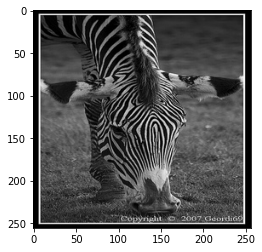

In [ ]:
pyplot.imshow((1+trainB[2])/2.0)

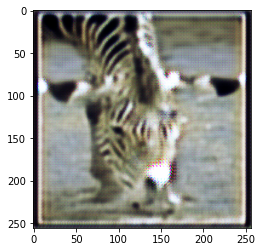

In [ ]:
pyplot.imshow(a)

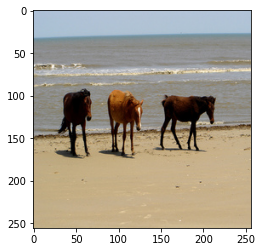

In [ ]:
pyplot.imshow((trainA[3]+1)/2.0)

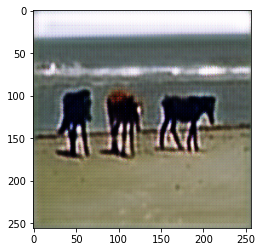

In [ ]:
pyplot.imshow(b)